**STOCK PRICE PREDICTION (CODE)**

In [ ]:
pip install library

  Created wheel for library: filename=Library-0.0.0-cp37-none-any.whl size=2088 sha256=59ecf0cedf79e407879eb047223b7da60db7c6b80fc01736cce024d3553fe50a
  Stored in directory: /root/.cache/pip/wheels/08/4a/c2/ab9e600e97ee6c0acd29a67304cd3acd7f1760b47ce3134dfe
Successfully built library


In [ ]:
pip install vaderSentiment 

     |████████████████████████████████| 133kB 11.5MB/s 


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as mlpt 
from textblob import TextBlob
from nltk.corpus import subjectivity 
from nltk.sentiment import SentimentAnalyzer 
from nltk.sentiment.util import *
from nltk import word_tokenize, sent_tokenize
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


**Import News Headlines Dataset**

In [ ]:
#Load the news headlines dataset 
from google.colab import files 
files.upload()

Saving headlines.csv to headlines.csv


{'headlines.csv': b'Date,Headlines\r\n2020-07-18,Johnson is asking Santa for a Christmas recovery\r\n2020-07-18,\xe2\x80\x98I now fear the worst\xe2\x80\x99: four grim tales of working life upended by Covid-19\r\n2020-07-18,Five key areas Sunak must tackle to serve up economic recovery\r\n2020-07-18,Covid-19 leaves firms \xe2\x80\x98fatally ill-prepared\xe2\x80\x99 for no-deal Brexit\r\n2020-07-18,"The Week in Patriarchy  \n\n\n  Bacardi\'s \'lady vodka\': the latest in a long line of depressing gendered products"\r\n2020-07-18,English councils call for smoking ban outside pubs and cafes\r\n2020-07-18,Can Tesla justify a $300bn valuation?\r\n2020-07-18,Empty city centres: \'I\xe2\x80\x99m not sure it will ever be the same again\'\r\n2020-07-18,Democratising finance for all? An investment app for amateurs and a student trader\'s death\r\n2020-07-18,"Homebuyer loses \xc2\xa3300,000 to fraudsters \xe2\x80\x93 but gets it back after we step in"\r\n2020-07-18,St Mawes named UK\xe2\x80\x99s 

In [ ]:
# Store dataset into a variable (ds1 = dataset1)
ds1 = pd.read_csv('headlines.csv')

In [ ]:
# Show df
ds1

,Date,Headlines
0,2020-07-18,Johnson is asking Santa for a Christmas recovery
1,2020-07-18,‘I now fear the worst’: four grim tales of wor...
2,2020-07-18,Five key areas Sunak must tackle to serve up e...
3,2020-07-18,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,2020-07-18,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17795,2017-12-17,How investing in solar energy can create a bri...
17796,2017-12-17,Poundland suppliers hit by insurance downgrade
17797,2017-12-17,Cryptocurrencies: City watchdog to investigate...
17798,2017-12-17,Unilever sells household name spreads to KKR f...


In [ ]:
# Show entire headlines column before text preprocessing 
ds1.Headlines 

**Data Preprocessing**

Removing punctuation, numbers, special characters, whitespaces/tabs & lowercasing.

In [ ]:
#  1A) Removing punctuations from headlines 
# Example 
ds1.Headlines[1839]

"'I don't want this job to kill me': why have 68 New York transit workers died during the pandemic?"

In [ ]:
# Function removes punctuation from headlines 
def cleanHlA(text):
  text = ''.join([c for c in text if c not in string.punctuation])
  return text

# Cleans the healines column
ds1['Headlines']= ds1['Headlines'].apply(cleanHlA)

In [ ]:
# Show example 
ds1.Headlines[1839]

'I dont want this job to kill me why have 68 New York transit workers died during the pandemic'

In [ ]:
#  1B) Removing numbers & special characters from headlines 
# Example 
ds1.Headlines[1855]

'Business live  Britons finances weakest since 2011 Covid19 knocks oil near 10 a barrel – as it happened'

In [ ]:
# Function removes numbers & special characters from headlines
def cleanHlB(text):
  pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
  return re.sub(pattern, '', text)

# Cleans the healines column 
ds1['Headlines']= ds1['Headlines'].apply(cleanHlB)

In [ ]:
# Show example 
ds1.Headlines[1855]

'Business live  Britons finances weakest since  Covid knocks oil near  a barrel  as it happened'

In [ ]:
#  1C) Removing extra whitespaces & tabs from headlines 
# Example 
ds1.Headlines[1855]

'Business live  Britons finances weakest since  Covid knocks oil near  a barrel  as it happened'

In [ ]:
# Function removes whitespaces & tabs from headlines 
def cleanHlC(text):
  pattern = r'^\s+$|\s+$'
  pattern = r'^\s*|\s\s*'
  return re.sub(pattern, ' ', text).strip()


# Cleans the healines column 
ds1['Headlines']= ds1['Headlines'].apply(cleanHlC)

In [ ]:
# Show example 
ds1.Headlines[1855]

'Business live Britons finances weakest since Covid knocks oil near a barrel as it happened'

In [ ]:
# 1D) Changing the headlines all to lowercase
# Example
ds1.Headlines[8699]

'Mars pulls MMs slotmachine game after MPs concerns'

In [ ]:
# Function changes headlines all to lowercase 
def cleanHlD(text): 
  return text.lower()


# Cleans the healines column 
ds1['Headlines']= ds1['Headlines'].apply(cleanHlD)

In [ ]:
# Show example 
ds1.Headlines[8699]

'mars pulls mms slotmachine game after mps concerns'

Removing Stopwords (a, an, all, and, but, how, the, etc)

In [ ]:
# Import Libraries 
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# 1E) Removing stopwords from healines 
# Example
ds1.Headlines[8]

'democratising finance for all an investment app for amateurs and a student traders death'

In [ ]:
# Function removes stopwords from headlines
def cleanHlE(text):
 text_tokens = word_tokenize(text)
 filtered_words = [w for w in text_tokens if not w in stopwords.words()]
 return " ".join(filtered_words)

# Cleans the healines column 
ds1['Headlines']= ds1['Headlines'].apply(cleanHlE)

In [ ]:
# Show example
ds1.Headlines[8]

'democratising finance investment app amateurs student traders death'

Lemmatization

In [ ]:
# Import Libraries
from nltk.stem import WordNetLemmatizer
import spacy

In [ ]:
# Example 
ds1.Headlines[14530]

'sugary drinks panel advising stops short recommending tax'

In [ ]:
# Spacy English 'en' model 
nlp = spacy.load('en', disable=['parser', 'ner'])

# Function for lemmatization 
def lemmaHl(text):
  doc = nlp(text)
  return " ".join([token.lemma_ for token in doc])

# Applying lemmatization to headlines 
ds1['Headlines']= ds1['Headlines'].apply(lemmaHl)

In [ ]:
# Show example 
ds1.Headlines[14530]

'sugary drinks panel advise stop short recommend tax'

In [ ]:
# Show entire headlines column after text preprocessing 
ds1.Headlines

In [ ]:
# OPTIONAL: This allows you to see all the rows in the dataset 
#pd.set_option("max_rows", None)

# Show 
#ds1

In [ ]:
# OPTIONAL: Back to orginal format (showing few rows)
#pd.reset_option("max_rows")

# Show 
#ds1

**Sentiment Analysis**

In [ ]:
# Create a function to get subjectivity 
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity 
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
# Create new columns Subjectivity & Polarity 
ds1['Subjectivity'] = ds1['Headlines'].apply(getSubjectivity)
ds1['Polarity'] = ds1['Headlines'].apply(getPolarity)

# Show new columns
ds1

,Date,Headlines,Subjectivity,Polarity
0,2020-07-18,johnson ask santa christmas recovery,0.000000,0.000000
1,2020-07-18,fear bad four grim tale work life upend covid,0.833333,-0.850000
2,2020-07-18,five key area sunak must tackle serve economic...,0.600000,0.100000
3,2020-07-18,covid leave firm fatally illprepare nodeal brexit,0.400000,-0.200000
4,2020-07-18,week patriarchy bacardis lady vodka late long ...,0.344444,-0.138889
...,...,...,...,...
17795,2017-12-17,invest solar energy create bright future africa,0.462500,0.350000
17796,2017-12-17,poundland supplier hit insurance downgrade,0.000000,0.000000
17797,2017-12-17,cryptocurrencies city watchdog investigate new...,0.454545,0.136364
17798,2017-12-17,unilever sell household spread kkr bn,0.000000,0.000000


In [ ]:
# Create function to compute negative, neutral and positive analysis 
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0: 
    return 'Neutral'
  else: 
    return 'Positive'

# Create column analysis 
ds1['Analysis'] = ds1['Polarity'].apply(getAnalysis)

# Show 
ds1

,Date,Headlines,Subjectivity,Polarity,Analysis
0,2020-07-18,johnson ask santa christmas recovery,0.000000,0.000000,Neutral
1,2020-07-18,fear bad four grim tale work life upend covid,0.833333,-0.850000,Negative
2,2020-07-18,five key area sunak must tackle serve economic...,0.600000,0.100000,Positive
3,2020-07-18,covid leave firm fatally illprepare nodeal brexit,0.400000,-0.200000,Negative
4,2020-07-18,week patriarchy bacardis lady vodka late long ...,0.344444,-0.138889,Negative
...,...,...,...,...,...
17795,2017-12-17,invest solar energy create bright future africa,0.462500,0.350000,Positive
17796,2017-12-17,poundland supplier hit insurance downgrade,0.000000,0.000000,Neutral
17797,2017-12-17,cryptocurrencies city watchdog investigate new...,0.454545,0.136364,Positive
17798,2017-12-17,unilever sell household spread kkr bn,0.000000,0.000000,Neutral


In [ ]:
# Import Libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# Sentiment scores: negative, neutral, positive & compound 
analyzer = SentimentIntensityAnalyzer()
ds1['neg'] = ds1['Headlines'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
ds1['neu'] = ds1['Headlines'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
ds1['pos'] = ds1['Headlines'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
ds1['compound'] = ds1['Headlines'].apply(lambda x:analyzer.polarity_scores(x)['compound'])

# Show sentiment scores 
ds1

,Date,Headlines,Subjectivity,Polarity,Analysis,neg,neu,pos,compound
0,2020-07-18,johnson ask santa christmas recovery,0.000000,0.000000,Neutral,0.000,1.000,0.00,0.0000
1,2020-07-18,fear bad four grim tale work life upend covid,0.833333,-0.850000,Negative,0.634,0.366,0.00,-0.8860
2,2020-07-18,five key area sunak must tackle serve economic...,0.600000,0.100000,Positive,0.000,1.000,0.00,0.0000
3,2020-07-18,covid leave firm fatally illprepare nodeal brexit,0.400000,-0.200000,Negative,0.519,0.481,0.00,-0.6597
4,2020-07-18,week patriarchy bacardis lady vodka late long ...,0.344444,-0.138889,Negative,0.242,0.758,0.00,-0.4939
...,...,...,...,...,...,...,...,...,...
17795,2017-12-17,invest solar energy create bright future africa,0.462500,0.350000,Positive,0.000,0.360,0.64,0.7269
17796,2017-12-17,poundland supplier hit insurance downgrade,0.000000,0.000000,Neutral,0.000,1.000,0.00,0.0000
17797,2017-12-17,cryptocurrencies city watchdog investigate new...,0.454545,0.136364,Positive,0.000,1.000,0.00,0.0000
17798,2017-12-17,unilever sell household spread kkr bn,0.000000,0.000000,Neutral,0.000,1.000,0.00,0.0000


**Data Visualisation (Sentiment Analysis)**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

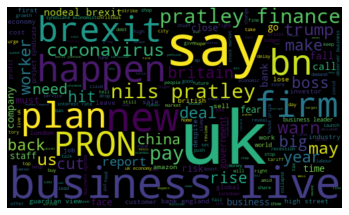

In [ ]:
# Word Cloud 
allWords = ' '.join([txt for txt in ds1['Headlines']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

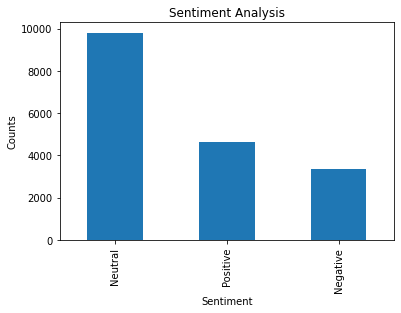

In [ ]:
# Plot bar chart 
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
ds1['Analysis'].value_counts().plot(kind = 'bar')

plt.show()

In [ ]:
# Show the amount of positive, neutral & negative headlines 
ds1['Analysis'].value_counts()

Neutral     9805
Positive    4614
Negative    3381
Name: Analysis, dtype: int64

In [ ]:
# Show percentage of negative headlines
negheadl = ds1[ds1.Analysis == 'Negative']
negheadl = negheadl['Headlines']
negheadl

round( (negheadl.shape[0] / ds1.shape[0]) * 100, 1)

19.0

In [ ]:
# Show percentage of neutral headlines
neuheadl = ds1[ds1.Analysis == 'Neutral']
neuheadl = neuheadl['Headlines']
neuheadl

round( (neuheadl.shape[0] / ds1.shape[0]) * 100, 1)

55.1

In [ ]:
# Show percentage of positive headlines
posheadl = ds1[ds1.Analysis == 'Positive']
posheadl = posheadl['Headlines']
posheadl

round( (posheadl.shape[0] / ds1.shape[0]) * 100, 1)

25.9

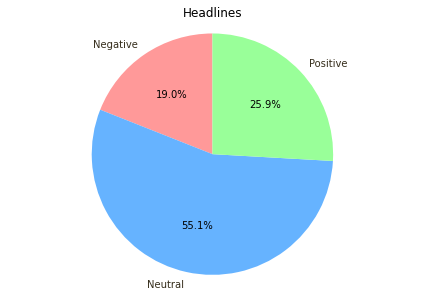

In [ ]:
# Plot Pie chart 
labels = ['Negative', 'Neutral', 'Positive']
sizes = [19, 55.1, 25.9]

# Pie chart colours
colors = ['#ff9999','#66b3ff','#99ff99']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('#362e1c')
for autotext in autotexts:
    autotext.set_color('black')

# Ratios of the pie chart circle 
ax1.axis('equal')  
plt.tight_layout()
plt.title('Headlines')
plt.show()

**Import Stock Dataset**

In [ ]:
# Load the stock price dataset 
from google.colab import files 
files.upload()

Saving GSPC.csv to GSPC.csv


{'GSPC.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2017-12-01,2645.100098,2650.620117,2605.520020,2642.219971,2642.219971,3942320000\n2017-12-04,2657.189941,2665.189941,2639.030029,2639.439941,2639.439941,4023150000\n2017-12-05,2639.780029,2648.719971,2627.729980,2629.570068,2629.570068,3539040000\n2017-12-06,2626.239990,2634.409912,2624.750000,2629.270020,2629.270020,3229000000\n2017-12-07,2628.379883,2640.989990,2626.530029,2636.979980,2636.979980,3292400000\n2017-12-08,2646.209961,2651.649902,2644.100098,2651.500000,2651.500000,3106150000\n2017-12-11,2652.189941,2660.330078,2651.469971,2659.989990,2659.989990,3091950000\n2017-12-12,2661.729980,2669.719971,2659.780029,2664.110107,2664.110107,3555680000\n2017-12-13,2667.590088,2671.879883,2662.850098,2662.850098,2662.850098,3542370000\n2017-12-14,2665.870117,2668.090088,2652.010010,2652.010010,2652.010010,3430030000\n2017-12-15,2660.629883,2679.629883,2659.139893,2675.810059,2675.810059,5723920000\n2017-12-18,2685.919922,2694.9

In [ ]:
# Store dataset as variable
ds2 = pd.read_csv('GSPC.csv')

In [ ]:
# Show stock data
ds2 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,2645.100098,2650.620117,2605.520020,2642.219971,2642.219971,3942320000
1,2017-12-04,2657.189941,2665.189941,2639.030029,2639.439941,2639.439941,4023150000
2,2017-12-05,2639.780029,2648.719971,2627.729980,2629.570068,2629.570068,3539040000
3,2017-12-06,2626.239990,2634.409912,2624.750000,2629.270020,2629.270020,3229000000
4,2017-12-07,2628.379883,2640.989990,2626.530029,2636.979980,2636.979980,3292400000
...,...,...,...,...,...,...,...
660,2020-07-20,3224.290039,3258.610107,3215.159912,3251.840088,3251.840088,3971200000
661,2020-07-21,3268.520020,3277.290039,3247.770020,3257.300049,3257.300049,4547960000
662,2020-07-22,3254.860107,3279.320068,3253.100098,3276.020020,3276.020020,4255190000
663,2020-07-23,3271.639893,3279.989990,3222.659912,3235.659912,3235.659912,4290460000


**Stock Data Preprocessing**

In [ ]:
# Drop columns that are not needed for the prediction. 
ds2.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

# Show 
ds2

,Date,Adj Close
0,2017-12-01,2642.219971
1,2017-12-04,2639.439941
2,2017-12-05,2629.570068
3,2017-12-06,2629.270020
4,2017-12-07,2636.979980
...,...,...
660,2020-07-20,3251.840088
661,2020-07-21,3257.300049
662,2020-07-22,3276.020020
663,2020-07-23,3235.659912


**Combining Stock Data & Sentiment Scores** 

In [ ]:
# The merge function combines headlines and stock data together by the same date. 
merge = ds2.merge(ds1, how='inner', on='Date', left_index= True)

# Show merge df 
merge

,Date,Adj Close,Headlines,Subjectivity,Polarity,Analysis,neg,neu,pos,compound
17740,2017-12-18,2690.159912,france save marquis sades days sodom auction,0.000000,0.000000,Neutral,0.000,0.652,0.348,0.4939
17741,2017-12-18,2690.159912,business live bitcoin bubble warning grow loud...,0.475000,0.078788,Positive,0.179,0.821,0.000,-0.3400
17742,2017-12-18,2690.159912,investigate ikea dutch deal reduce tax bill bn,0.000000,0.000000,Neutral,0.000,1.000,0.000,0.0000
17743,2017-12-18,2690.159912,hermes delivery driver diary show flipside chr...,0.000000,0.000000,Neutral,0.000,1.000,0.000,0.0000
17744,2017-12-18,2690.159912,uk manufacture order book near threedecade hig...,0.470000,0.130000,Positive,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...
35,2020-07-17,3224.729980,fifth brazilian europe result deforestation,0.000000,0.000000,Neutral,0.000,1.000,0.000,0.0000
36,2020-07-17,3224.729980,public sector pension discrimination could cos...,0.066667,0.000000,Neutral,0.000,1.000,0.000,0.0000
37,2020-07-17,3224.729980,world large oil firm agree carbon cut tackle c...,0.414286,0.007143,Positive,0.395,0.446,0.159,-0.5719
38,2020-07-17,3224.729980,boohoo share rise cofounder pump firm,0.400000,-0.200000,Negative,0.000,0.694,0.306,0.2960


In [ ]:
# Drop duplicate rows (this is beacuase there are dupilcate dates and prices)
merge.drop_duplicates(subset=['Date', 'Adj Close'], inplace=True)


# Show
merge

,Date,Adj Close,Headlines,Subjectivity,Polarity,Analysis,neg,neu,pos,compound
17740,2017-12-18,2690.159912,france save marquis sades days sodom auction,0.000000,0.000000,Neutral,0.000,0.652,0.348,0.4939
17720,2017-12-19,2681.469971,house price fall london southeast say surveyor,0.000000,0.000000,Neutral,0.000,1.000,0.000,0.0000
17700,2017-12-20,2679.250000,hedge fund fail stop billiondollar brain city ...,0.300000,-0.500000,Negative,0.449,0.551,0.000,-0.6908
17680,2017-12-21,2684.570068,guardian brexit watch brexit help push living ...,0.000000,0.000000,Neutral,0.000,0.787,0.213,0.4019
17660,2017-12-22,2683.340088,steelworker huge pension cut tata complete merger,0.650000,0.250000,Positive,0.223,0.532,0.245,0.0516
...,...,...,...,...,...,...,...,...,...,...
120,2020-07-13,3155.219971,offshore wind energy investment quadruple desp...,0.000000,0.000000,Neutral,0.000,0.769,0.231,0.2732
100,2020-07-14,3197.520020,british airways sell art collection ease covid...,0.000000,0.000000,Neutral,0.206,0.561,0.234,0.0772
60,2020-07-15,3226.560059,incredible boohoo deny knowledge factory alleg...,0.900000,0.900000,Positive,0.277,0.723,0.000,-0.3976
40,2020-07-16,3215.570068,canary wharf trader landlord bank return office,0.000000,0.000000,Neutral,0.000,1.000,0.000,0.0000


In [ ]:
# Predicting the values for 1, 5, 10 etc(change the number below when your forecasting for different days)
forecast_out = 1
# Creates a prediction column 
merge['Prediction'] = merge[['Adj Close']].shift(-forecast_out)

# Show newdf 
merge

,Date,Adj Close,Headlines,Subjectivity,Polarity,Analysis,neg,neu,pos,compound,Prediction
17740,2017-12-18,2690.159912,france save marquis sades days sodom auction,0.000000,0.000000,Neutral,0.000,0.652,0.348,0.4939,2681.469971
17720,2017-12-19,2681.469971,house price fall london southeast say surveyor,0.000000,0.000000,Neutral,0.000,1.000,0.000,0.0000,2679.250000
17700,2017-12-20,2679.250000,hedge fund fail stop billiondollar brain city ...,0.300000,-0.500000,Negative,0.449,0.551,0.000,-0.6908,2684.570068
17680,2017-12-21,2684.570068,guardian brexit watch brexit help push living ...,0.000000,0.000000,Neutral,0.000,0.787,0.213,0.4019,2683.340088
17660,2017-12-22,2683.340088,steelworker huge pension cut tata complete merger,0.650000,0.250000,Positive,0.223,0.532,0.245,0.0516,2682.620117
...,...,...,...,...,...,...,...,...,...,...,...
120,2020-07-13,3155.219971,offshore wind energy investment quadruple desp...,0.000000,0.000000,Neutral,0.000,0.769,0.231,0.2732,3197.520020
100,2020-07-14,3197.520020,british airways sell art collection ease covid...,0.000000,0.000000,Neutral,0.206,0.561,0.234,0.0772,3226.560059
60,2020-07-15,3226.560059,incredible boohoo deny knowledge factory alleg...,0.900000,0.900000,Positive,0.277,0.723,0.000,-0.3976,3215.570068
40,2020-07-16,3215.570068,canary wharf trader landlord bank return office,0.000000,0.000000,Neutral,0.000,1.000,0.000,0.0000,3224.729980


In [ ]:
# Replace NaN values with average 
merge.fillna(merge.mean(), inplace=True)

# Show
merge

,Date,Adj Close,Headlines,Subjectivity,Polarity,Analysis,neg,neu,pos,compound,Prediction
17740,2017-12-18,2690.159912,france save marquis sades days sodom auction,0.000000,0.000000,Neutral,0.000,0.652,0.348,0.4939,2681.469971
17720,2017-12-19,2681.469971,house price fall london southeast say surveyor,0.000000,0.000000,Neutral,0.000,1.000,0.000,0.0000,2679.250000
17700,2017-12-20,2679.250000,hedge fund fail stop billiondollar brain city ...,0.300000,-0.500000,Negative,0.449,0.551,0.000,-0.6908,2684.570068
17680,2017-12-21,2684.570068,guardian brexit watch brexit help push living ...,0.000000,0.000000,Neutral,0.000,0.787,0.213,0.4019,2683.340088
17660,2017-12-22,2683.340088,steelworker huge pension cut tata complete merger,0.650000,0.250000,Positive,0.223,0.532,0.245,0.0516,2682.620117
...,...,...,...,...,...,...,...,...,...,...,...
120,2020-07-13,3155.219971,offshore wind energy investment quadruple desp...,0.000000,0.000000,Neutral,0.000,0.769,0.231,0.2732,3197.520020
100,2020-07-14,3197.520020,british airways sell art collection ease covid...,0.000000,0.000000,Neutral,0.206,0.561,0.234,0.0772,3226.560059
60,2020-07-15,3226.560059,incredible boohoo deny knowledge factory alleg...,0.900000,0.900000,Positive,0.277,0.723,0.000,-0.3976,3215.570068
40,2020-07-16,3215.570068,canary wharf trader landlord bank return office,0.000000,0.000000,Neutral,0.000,1.000,0.000,0.0000,3224.729980


In [ ]:
# Keeping the columns needed for stock prediction 
keep_columns =['Date', 'Adj Close', 'neg', 'neu','pos', 'compound', 'Prediction']
newdf = merge[keep_columns]

# Show 
newdf

,Date,Adj Close,neg,neu,pos,compound,Prediction
17740,2017-12-18,2690.159912,0.000,0.652,0.348,0.4939,2681.469971
17720,2017-12-19,2681.469971,0.000,1.000,0.000,0.0000,2679.250000
17700,2017-12-20,2679.250000,0.449,0.551,0.000,-0.6908,2684.570068
17680,2017-12-21,2684.570068,0.000,0.787,0.213,0.4019,2683.340088
17660,2017-12-22,2683.340088,0.223,0.532,0.245,0.0516,2682.620117
...,...,...,...,...,...,...,...
120,2020-07-13,3155.219971,0.000,0.769,0.231,0.2732,3197.520020
100,2020-07-14,3197.520020,0.206,0.561,0.234,0.0772,3226.560059
60,2020-07-15,3226.560059,0.277,0.723,0.000,-0.3976,3215.570068
40,2020-07-16,3215.570068,0.000,1.000,0.000,0.0000,3224.729980


In [ ]:
# OPTIONAL
# Renaming the columns to make the attributes consistent and clearer 
newdf.columns = (['Date','Adj Close','Negative','Neutral','Positive', 'Compound', 'Prediction'])

newdf

,Date,Adj Close,Negative,Neutral,Positive,Compound,Prediction
17740,2017-12-18,2690.159912,0.000,0.652,0.348,0.4939,2681.469971
17720,2017-12-19,2681.469971,0.000,1.000,0.000,0.0000,2679.250000
17700,2017-12-20,2679.250000,0.449,0.551,0.000,-0.6908,2684.570068
17680,2017-12-21,2684.570068,0.000,0.787,0.213,0.4019,2683.340088
17660,2017-12-22,2683.340088,0.223,0.532,0.245,0.0516,2682.620117
...,...,...,...,...,...,...,...
120,2020-07-13,3155.219971,0.000,0.769,0.231,0.2732,3197.520020
100,2020-07-14,3197.520020,0.206,0.561,0.234,0.0772,3226.560059
60,2020-07-15,3226.560059,0.277,0.723,0.000,-0.3976,3215.570068
40,2020-07-16,3215.570068,0.000,1.000,0.000,0.0000,3224.729980


**Regression Algorithms | Train-Test Split | Stock Price Prediction | Results**


In [ ]:
# Import Libraries (regression algorithm )
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor


lr = LinearRegression()
#dtr = DecisionTreeRegressor()
#rfr = RandomForestRegressor()
#mlpr = MLPRegressor()

In [ ]:
# X = inputs & y = output 
X = newdf[['Adj Close','Negative','Neutral','Positive', 'Compound']]

y = newdf['Prediction']

In [ ]:
#Different train-test split scenarios

# Split dataset into train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#  Split dataset into train-test split (70% train, 30% test)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Split dataset into train-test split (60% train, 40% test)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)


In [ ]:
# Fit the regression models 
lr.fit(X_train, y_train)
#dtr.fit(X_train, y_train)
#rfr.fit(X_train, y_train)
#mlpr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Stock price predictions using different regression algorithms
y_predict = lr.predict(X_test)
#y_predict = dtr.predict(X_test)
#y_predict = rfr.predict(X_test)
#y_predict = mlpr.predict(X_test)

# Show 
y_predict 

array([2883.03858163, 3167.57839588, 2396.92570428, 2819.6076775 ,
       2776.44360077, 3114.06986917, 2772.35138794, 2686.55065028,
       2887.46211093, 2975.79894523, 2873.15125062, 3338.74124369,
       2877.61702888, 2648.39834426, 2848.55147198, 2932.1345044 ,
       2973.34350977, 2737.55378889, 2883.31468356, 2647.48538883,
       3211.63926157, 2843.17657852, 2968.36090497, 2712.94052775,
       2663.24586144, 3002.46276985, 2588.07063089, 3136.57261888,
       2653.44572222, 2680.29195907, 3264.24490811, 3159.66617399,
       2791.37589176, 3106.53665067, 3112.36184358, 2904.40273571,
       2821.98379416, 2740.10772096, 2668.45562853, 3094.13862604,
       2912.06714234, 2943.62151634, 2747.13484573, 2704.60701955,
       2675.69169251, 2909.13141437, 2938.19608112, 2800.93995366,
       3013.66386313, 2781.9273333 , 2883.85371212, 2594.54472158,
       2751.94769149, 2699.8281108 , 2762.13361037, 2790.03906876,
       2787.06961329, 2715.25232165, 2753.00640089, 2902.86664

In [ ]:
# How test set performed in comparison to predictions 
y_test

2740     2741.379883
260      3145.320068
2600     2529.189941
8980     2805.370117
13720    2801.310059
            ...     
11940    2809.209961
12960    2896.739990
8160     2876.320068
17180    2810.300049
15980    2747.330078
Name: Prediction, Length: 121, dtype: float64

In [ ]:
#Linear Regression 
lr.score(X_test, y_test)

#Decision Trees
#dtr.score(X_test, y_test)

# Random Forest
#rfr.score(X_test, y_test)

# Neural Network 
#mlpr.score(X_test, y_test)

0.9121712769688992

**Data Visualisation (Stock Price Prediction)**


In [ ]:
# Check the Actual and Predicted price in a Dataframe 
df3=pd.DataFrame({'Predicted':y_predict, 'Actual':y_test })

# Show df3 
df3

,Predicted,Actual
2740,2883.038582,2741.379883
260,3167.578396,3145.320068
2600,2396.925704,2529.189941
8980,2819.607677,2805.370117
13720,2776.443601,2801.310059
...,...,...
11940,2811.756768,2809.209961
12960,2875.812815,2896.739990
8160,2852.614539,2876.320068
17180,2799.764286,2810.300049


In [ ]:
# Pearson Correlation Coefficient 
from scipy import stats

In [ ]:
# Obtained a correlation coefficent of 0.89, meaning the predicted and actual values strongly correlate. 
# 1–0.8 → Very strong/ 0.799–0.6 → Strong/ 0.599–0.4 → Moderate/ 0.399–0.2 → Weak/ 0.199–0 → Very Weak
pearson_coef, p_value = stats.pearsonr(y_test, y_predict )
print(pearson_coef)

0.9551297774068321


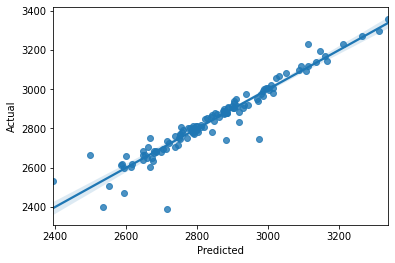

In [ ]:
# Import library
import seaborn as sns

# Graph
sns.regplot(x="Predicted", y="Actual", data=df3);

In [ ]:
columns = ['Predicted','Actual']

corr_matrix = df3.loc[:, columns].corr()
print(corr_matrix)

           Predicted   Actual
Predicted    1.00000  0.95513
Actual       0.95513  1.00000


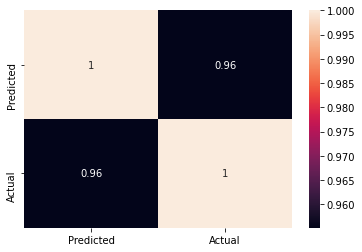

In [ ]:
sns.heatmap(corr_matrix, annot=True)
plt.show()